In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D


In [2]:
df=pd.read_csv('StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
feature=['gender','race/ethnicity','parental level of education','lunch','test preparation course']
df.drop(feature , axis=1,inplace=True)

In [6]:
df.head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [7]:
math=df['math score'].values
read = df['reading score'].values
write= df['writing score'].values

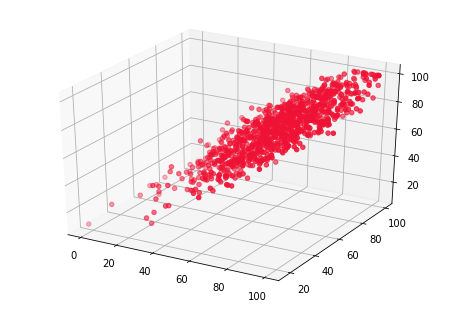

In [8]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(math,read,write, color='#ef1234')
plt.show()

In [9]:
m = len(math)
x0 = np.ones(m)
X = np.array([x0, math, read]).T
B = np.array([0, 0, 0])
Y = np.array(write)
alpha = 0.0001

In [10]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

In [11]:
cost_function(X, Y, B)

2431.012

In [12]:
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        h = X.dot(B)
        loss = h - Y
        gradient = X.T.dot(loss) / m
        B = B - alpha * gradient
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
        
    return B, cost_history

In [13]:
newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)

In [14]:
cost_history[-1]

10.076656014293768

In [15]:
newB

array([-0.3868788 ,  0.06395473,  0.92882913])

In [16]:
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

In [17]:
Y_pred = X.dot(newB)

In [18]:
rmse(Y, Y_pred)

4.489244037539897

In [19]:
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

In [20]:
r2_score(Y, Y_pred)

0.9126340957709196